#### Library

In [1]:
# Importação das bibliotecas
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt
import pandas as pd
from sklearn.utils import resample
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Rafaça o código de treinamento da aula 12: “K-Nearest Neighbors -
Prática” no seu computador usando o Jupyter Notebook ou o Google Colabs.




In [ ]:
# Importação das bibliotecas

# Carregamento dos dados
df = pd.read_csv( '../dataset/train.csv' )
# Seleção de Features
features = ['idade', 'saldo_atual', 'divida_atual', 'renda_anual', 'valor_em_investimentos',
'taxa_utilizacao_credito', 'num_emprestimos', 'num_contas_bancarias', 'num_cartoes_credito',
'dias_atraso_dt_venc', 'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros']
label = ['limite_adicional']
# Preparação dos dados de treino
x_train = df.loc[:, features]
y_train = df.loc[:, label].values.ravel()
# Treinamento do algoritmo KNN
knn_classifier = KNeighborsClassifier( n_neighbors = 8 )
knn_classifier.fit( x_train, y_train )
# Previsão das observações
y_pred = knn_classifier.predict( x_train )
# Comparação do Previsto com o Realizado
df1 = df.loc[:, ['id_cliente', 'limite_adicional']]
df1['predicted'] = y_pred

2. Retreino o algoritmo com os seguintes valores para K: [3, 5, 7, 9, 11, 13,
15, 17, 19 e 21] e anote a acurácia.


In [2]:
# Importação das bibliotecas

# Carregamento dos dados
df = pd.read_csv( 'dataset/train.csv' )
# Seleção de Features
features = ['idade', 'saldo_atual', 'divida_atual', 'renda_anual', 'valor_em_investimentos',
'taxa_utilizacao_credito', 'num_emprestimos', 'num_contas_bancarias', 'num_cartoes_credito',
'dias_atraso_dt_venc', 'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros']
label = ['limite_adicional']
# Preparação dos dados de treino
x_train = df.loc[:, features]
y_train = df.loc[:, label].values.ravel()

K = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
resultados_accuracy = []
resultados_accuracy_dic = {3:0, 5:0, 7:0, 9:0, 11:0, 13:0, 15:0, 17:0, 19:0, 21:0}
for n_vizinhos in K:
    # Treinamento do algoritmo KNN
    knn_classifier = KNeighborsClassifier( n_neighbors = n_vizinhos )
    knn_classifier.fit( x_train, y_train )

    # Previsão das observações
    y_pred = knn_classifier.predict( x_train )
    # Comparação do Previsto com o Realizado
    df1 = df.loc[:, ['id_cliente', 'limite_adicional']]
    df1['predicted'] = y_pred

    # Acurracy 
    resultados_accuracy.append(mt.accuracy_score( y_train, y_pred ))
    resultados_accuracy_dic[n_vizinhos] = mt.accuracy_score( y_train, y_pred) 

In [3]:
resultados_accuracy

[0.8854736842105263,
 0.8667368421052631,
 0.8590526315789474,
 0.8528421052631578,
 0.85,
 0.8492631578947368,
 0.848,
 0.8478947368421053,
 0.8478947368421053,
 0.8462105263157895]

In [4]:
# número de vizinhos : resultado da acurracy
resultados_accuracy_dic

{3: 0.8854736842105263,
 5: 0.8667368421052631,
 7: 0.8590526315789474,
 9: 0.8528421052631578,
 11: 0.85,
 13: 0.8492631578947368,
 15: 0.848,
 17: 0.8478947368421053,
 19: 0.8478947368421053,
 21: 0.8462105263157895}

3. Qual o problema principal de usar a métrica acurácia? Escreve um
exemplo hipotético, no qual o problema acontece.


Tudo começa pela formulação da métrica, sua fórmula é composta por seguintes partes da matriz de confusão TP+TN/ TP+TN+FP+FN, se verdadeiro positivo ou verdadeiro negativo for a maioria e nesse o classificador ir muito bem, a métrica retornará uma boa pontuação, o que pode levar uma interpretação errada sobre o desempenho do classificador, por isso, ele não é recomendado para dados desbalanceados.

4. Explique com um pequeno texto ilustrando a diferença entre a métrica de
Precision e Recall e mostrando quando usa deve ser escolhida em relação a
outra.

A fórmula da Precission (precisão) é TP/(TP+FP) ele está observando clareamente a precisão, quanto é realmente positivo dos que foram classificados positivos, custuma dizer que é a quantidade de acerto por tentativa.
A fórmula da Recall é TP/TP+FN ele está procurando saber do conjunto positivo, quantos conseguimos lembrar ou reconhecer.
Então podemos resume que Precission ele olha para o que foi classificado, já o Recall olha para o conjuntos tipos. 
Exemplo: Imagine que em um balde tenha ouro e ouro de tolo juntos em pedras pequenas e eu não sei diferenciar.  É permitido eu pegar o máximo possível em 10s, após pegar sou instruindo para saber diferenciar eles, eu olho e conto o quanto eu peguei era realmente ouro, a precisão de captura (Precision). Depois eu obeservo o quanto de ouro eu peguei e quantidade total de ouro que tinha no balde (Recall)

5. Escreve um trecho de código que automatize o treinamento do algoritmo
K-NN, a fim de encontrar o melhor valor para K, do exercício 2.

In [3]:
# Importação das bibliotecas

# Carregamento dos dados
df = pd.read_csv( 'dataset/train.csv' )

# Seleção de Features
features = ['idade', 'saldo_atual', 'divida_atual', 'renda_anual', 'valor_em_investimentos',
'taxa_utilizacao_credito', 'num_emprestimos', 'num_contas_bancarias', 'num_cartoes_credito',
'dias_atraso_dt_venc', 'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros']
label = ['limite_adicional']
# Preparação dos dados de treino
x_train = df.loc[:, features]
y_train = df.loc[:, label].values.ravel()

melhor_resulado = {'chave':'valor'}
K = int(input("Informe número de vizinhos que quer testa"))
vizinho = 0
nota = 0
for n_vizinhos in list(range(1,K+1)):
    # Treinamento do algoritmo KNN
    knn_classifier = KNeighborsClassifier( n_neighbors = n_vizinhos )
    knn_classifier.fit( x_train, y_train )

    # Previsão das observações
    y_pred = knn_classifier.predict( x_train )
    # Comparação do Previsto com o Realizado
    df1 = df.loc[:, ['id_cliente', 'limite_adicional']]
    df1['predicted'] = y_pred

    # Acurracy 
   
    acurracy =mt.accuracy_score( y_train, y_pred )
    if nota< mt.accuracy_score( y_train, y_pred ):
        vizinho = n_vizinhos
        nota = mt.accuracy_score( y_train, y_pred )
        resultado  = {vizinho: nota}
        y_pred_ = y_pred
    print(f"O resultado foi {nota} com {vizinho} vizinhos")
print(f"O melhor resultado foi {nota} com {vizinho} vizinhos")

O resultado foi 1.0 com 1 vizinhos
O resultado foi 1.0 com 1 vizinhos
O resultado foi 1.0 com 1 vizinhos
O melhor resultado foi 1.0 com 1 vizinhos


6. Escreva um pequeno texto, explicando as 6 denominações da matriz de
confusão: P, N, TP, FN, FP e TN Exercícios 2

* Positive - alvo de referência
* Negative - qualquer alvo que não seja referência
* True Positive - Classificado como alvo de referência e realmente era
* Falso Negative - Classificado como Negativo, mas era o alvo de referência
* Falso Positive - Classificado como alvo de referência, mas na verdade não era
* True Negative - Classifcado como não alvo de referência e não era na vida real.

7. No conjunto de dados usado na aula 12: “K-Nearest Neighbors - Prática”,
existe alguma variável que fere as premissas do K-NN? Se sim ou não,
explique.

Se os dados for muito grande ele começa a fica lento e menos preiciso.

8. Faça a seguinte bateria de testes

    8.1 Class balanceada originalmente:
1. Faça a matriz de confusão, calcule a acurácia, recall e precision do
conjunto de dados original
2. Anote os resultados.

In [5]:
# 4.1 Confusion Matrix
matriz =mt.confusion_matrix( y_train, y_pred_ )
print(f"Resultado da matriz de confusão {matriz}")
# 4.2 Accuracy
acurracy=mt.accuracy_score( y_train, y_pred_ )
print(f"Resultado da matriz de confusão {acurracy}")

# 4.3 Precisao
precission=mt.precision_score( y_train, y_pred_, average="binary", pos_label='Conceder' )
print(f"Resultado da matriz de confusão {precission}")
# 4.4 Recall
recall = mt.recall_score( y_train, y_pred_, average='binary', pos_label='Conceder' )
print(f"Resultado da matriz de confusão {recall}")


Resultado da matriz de confusão [[1505    0]
 [   0 7995]]
Resultado da matriz de confusão 1.0
Resultado da matriz de confusão 1.0
Resultado da matriz de confusão 1.0


8.2 Classe balanceada:
1. Mantenha a proporção de 50% das linhas da planilha de dados com
exemplos da classe “Conceder” e 50% com a classe “Negar”.
2. Faça a matriz de confusão, calcule a acurácia, recall e precision.
3. Anote os resultados.


In [48]:


# Carregamento dos dados
df = pd.read_csv( 'dataset/train.csv' )
# Seleção de Features
features = ['idade', 'saldo_atual', 'divida_atual', 'renda_anual', 'valor_em_investimentos',
'taxa_utilizacao_credito', 'num_emprestimos', 'num_contas_bancarias', 'num_cartoes_credito',
'dias_atraso_dt_venc', 'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros']
label = ['limite_adicional']



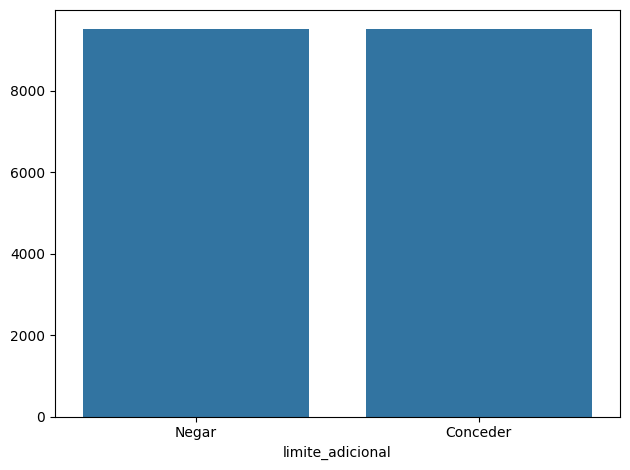

In [23]:

#criando uma figure, axes
fig, ax = plt.subplots()
#criando o gráfico de barras 
sns.barplot(x=df['limite_adicional'], y=df['limite_adicional'].count(), ax=ax, data=df)
#otimizar espaço da figure
fig.tight_layout();

In [ ]:
# Preparação dos dados de treino
x_train = df.loc[:, features]
y_train = df.loc[:, label].values.ravel()

melhor_resulado = {'chave':'valor'}
K = int(input("Informe número de vizinhos que quer testa"))
vizinho = 0
nota = 0
for n_vizinhos in list(range(1,K+1)):
    # Treinamento do algoritmo KNN
    knn_classifier = KNeighborsClassifier( n_neighbors = n_vizinhos )
    knn_classifier.fit( x_train, y_train )

    # Previsão das observações
    y_pred = knn_classifier.predict( x_train )
    # Comparação do Previsto com o Realizado
    df1 = df.loc[:, ['id_cliente', 'limite_adicional']]
    df1['predicted'] = y_pred

    # Acurracy 
   
    acurracy =mt.accuracy_score( y_train, y_pred )
    if nota< mt.accuracy_score( y_train, y_pred ):
        vizinho = n_vizinhos
        nota = mt.accuracy_score( y_train, y_pred )
        resultado  = {vizinho: nota}
        y_pred_ = y_pred
    print(f"O resultado foi {nota} com {vizinho} vizinhos")
print(f"O melhor resultado foi {nota} com {vizinho} vizinhos")

In [24]:
# 4.1 Confusion Matrix
matriz =mt.confusion_matrix( y_train, y_pred_ )
print(f"Resultado da matriz de confusão {matriz}")
# 4.2 Accuracy
acurracy=mt.accuracy_score( y_train, y_pred_ )
print(f"Resultado da matriz de confusão {acurracy}")

# 4.3 Precisao
precission=mt.precision_score( y_train, y_pred_, average="binary", pos_label='Conceder' )
print(f"Resultado da matriz de confusão {precission}")
# 4.4 Recall
recall = mt.recall_score( y_train, y_pred_, average='binary', pos_label='Conceder' )
print(f"Resultado da matriz de confusão {recall}")

Resultado da matriz de confusão [[1505    0]
 [   0 7995]]
Resultado da matriz de confusão 1.0
Resultado da matriz de confusão 1.0
Resultado da matriz de confusão 1.0


8.3 Classe desbalanceada 90/10
1. Mantenha a proporção de 90% das linhas da planilha de dados com
exemplos da classe “Conceder” e 10% com a classe “Negar”.
2. Faça a matriz de confusão, calcule a acurácia, recall e precision.
3. Anote os resultados.


In [15]:
#90% das linhas serão concender

# Suponha que você tenha um DataFrame chamado "df" com colunas "limite_adicional" e outras características
df = pd.read_csv( 'dataset/train.csv' )
#df.shape 
# São 9500 linhas
# Subamostragem
df_negar = df[df["limite_adicional"] == "Negar"]
#df_negar.shape
#A classe "Negar" tem 7995, logo 9500-7995 = 1505
df_conceder = df[df["limite_adicional"] == "Conceder"]
#df_conceder.shape
# A classe "Conceder" tem 1505

df_negar = df[df["limite_adicional"] == "Negar"]

df_aleatorio = df_negar.sample(n=6490, random_state=42)
df_negar = df_negar.drop(df_aleatorio.index)
# Agora a quantidade de dado estão iguais, em 1505, vamos reduzir novamente o df_negar
df_aleatorio = df_negar.sample(n=1340, random_state=42)
df_negar = df_negar.drop(df_aleatorio.index)
# Bem lembre que 90% Conceder, só que está 50% para cada classe 
# Seleciona aleatoriamente 10% dos exemplos da classe "Conceder"
df_conceder_sampled = resample(df_conceder)

# Seleciona aleatoriamente 90% dos exemplos da classe "Negar"
df_negar_sampled = resample(df_negar)

# Combina os subconjuntos para formar o novo conjunto de dados balanceado
df_resampled = pd.concat([df_negar_sampled, df_conceder_sampled])

# Agora df_resampled tem a proporção desejada


In [12]:
# Machine Learning

def knn(dataset):
    # Seleção de Features
    features = ['idade', 'saldo_atual', 'divida_atual', 'renda_anual', 'valor_em_investimentos',
    'taxa_utilizacao_credito', 'num_emprestimos', 'num_contas_bancarias', 'num_cartoes_credito',
    'dias_atraso_dt_venc', 'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros']
    label = ['limite_adicional']
    # Preparação dos dados de treino
    x_train = dataset.loc[:, features]
    y_train = dataset.loc[:, label].values.ravel()

    melhor_resulado = {'chave':'valor'}
    K = int(input("Informe número de vizinhos que quer testa"))
    vizinho = 0
    nota = 0
    for n_vizinhos in list(range(3, K+1)):
        # Treinamento do algoritmo KNN
        knn_classifier = KNeighborsClassifier( n_neighbors = n_vizinhos )
        knn_classifier.fit( x_train, y_train )

        # Previsão das observações
        y_pred = knn_classifier.predict( x_train )
        # Comparação do Previsto com o Realizado
    # df1 = df.loc[:, ['id_cliente', 'limite_adicional']]
        #df1['predicted'] = y_pred

        # Acurracy 

        acurracy =mt.accuracy_score( y_train, y_pred )
        if nota< mt.accuracy_score( y_train, y_pred ):
            vizinho = n_vizinhos
            nota = mt.accuracy_score( y_train, y_pred )
            resultado  = {vizinho: nota}
            y_pred_ = y_pred
        #print(f"O resultado foi {nota} com {vizinho} vizinhos")
    print(f"O melhor resultado foi {nota} com {vizinho} vizinhos")





    # 4.1 Confusion Matrix
    matriz =mt.confusion_matrix( y_train, y_pred_ )
    print(f"Resultado da matriz de confusão {matriz}")
    # 4.2 Accuracy
    acurracy=mt.accuracy_score( y_train, y_pred_ )
    print(f"Resultado da acurracy {acurracy}")

    # 4.3 Precisao
    precission=mt.precision_score( y_train, y_pred_, average="binary", pos_label='Conceder' )
    print(f"Resultado do precission {precission}")
    # 4.4 Recall
    recall = mt.recall_score( y_train, y_pred_, average='binary', pos_label='Conceder' )
    print(f"Resultado do recall  {recall}")

In [81]:
# K = 6

In [80]:
knn(df_resampled)

O melhor resultado foi 0.9050666666666667 com 5 vizinhos
Resultado da matriz de confusão [[1473   32]
 [ 146  224]]
Resultado da acurracy 0.9050666666666667
Resultado do precission 0.9098208770846201
Resultado do recall  0.9787375415282392


8.4 Refaça o exercícios 8.3 com as seguintes variações: 80/20, 70/30 e
60/40


In [5]:
#80/20
#80% das linhas serão concender
def reduzir(quantidade):
    # Suponha que você tenha um DataFrame chamado "df" com colunas "limite_adicional" e outras características
    df = pd.read_csv( 'dataset/train.csv' )
    #df.shape 
    # São 9500 linhas
    # Subamostragem
    df_negar = df[df["limite_adicional"] == "Negar"]
    #df_negar.shape
    #A classe "Negar" tem 7995, logo 9500-7995 = 1505
    df_conceder = df[df["limite_adicional"] == "Conceder"]
    #df_conceder.shape
    # A classe "Conceder" tem 1505

    df_negar = df[df["limite_adicional"] == "Negar"]

    df_aleatorio = df_negar.sample(n=6490, random_state=42)
    df_negar = df_negar.drop(df_aleatorio.index)
    # Agora a quantidade de dado estão iguais, em 1505, vamos reduzir novamente o df_negar
    df_aleatorio = df_negar.sample(n=quantidade, random_state=42)
    df_negar = df_negar.drop(df_aleatorio.index)
    print(df_negar.shape)
    # Bem lembre que 90% Conceder, só que está 50% para cada classe 
    # Seleciona aleatoriamente 10% dos exemplos da classe "Conceder"
    df_conceder_sampled = resample(df_conceder)

    # Seleciona aleatoriamente 90% dos exemplos da classe "Negar"
    df_negar_sampled = resample(df_negar)

    # Combina os subconjuntos para formar o novo conjunto de dados balanceado
    df_resampled = pd.concat([df_negar_sampled, df_conceder_sampled])
    return(df_resampled)
    # Agora df_resampled tem a proporção desejada

In [13]:
knn(reduzir(0))


(1505, 17)


O melhor resultado foi 0.9096345514950166 com 3 vizinhos
Resultado da matriz de confusão [[1379  126]
 [ 146 1359]]
Resultado da acurracy 0.9096345514950166
Resultado do precission 0.9042622950819672
Resultado do recall  0.9162790697674419


In [15]:
knn(reduzir(1340))

(165, 17)


O melhor resultado foi 0.9664670658682635 com 3 vizinhos
Resultado da matriz de confusão [[1490   15]
 [  41  124]]
Resultado da acurracy 0.9664670658682635
Resultado do precission 0.9732201175702155
Resultado do recall  0.9900332225913622


In [16]:
#80/20
knn(reduzir(1135))
# knn é função do modelo de machine learnin, reduzir é a função que reduz a quantidade da classe "Negar", no caso foi reduzido 1135 de 1505 por isso retornou 370

(370, 17)


O melhor resultado foi 0.9488 com 3 vizinhos
Resultado da matriz de confusão [[1476   29]
 [  67  303]]
Resultado da acurracy 0.9488
Resultado do precission 0.9565780946208684
Resultado do recall  0.9807308970099667


In [17]:
#70/30 e

knn(reduzir(885))

(620, 17)


O melhor resultado foi 0.9327058823529412 com 3 vizinhos
Resultado da matriz de confusão [[1446   59]
 [  84  536]]
Resultado da acurracy 0.9327058823529412
Resultado do precission 0.9450980392156862
Resultado do recall  0.9607973421926911


In [18]:
#60/40
knn(reduzir(970))

(535, 17)


O melhor resultado foi 0.925 com 3 vizinhos
Resultado da matriz de confusão [[1450   55]
 [  98  437]]
Resultado da acurracy 0.925
Resultado do precission 0.9366925064599483
Resultado do recall  0.9634551495016611


8.5 Crie um tabela de comparação entre os resultados das 3 métricas (
acurácia, recall e precision ) para cada uma das proporções ( 50/50, 90/10,
80/20, 70/30, 60/40 ) 

https://docs.google.com/spreadsheets/u/0/?tgif=d



e responda as seguintes perguntas:
1. Como a métrica da acurácia se comporta com a variação do
desbalanceamento do conjunto de dados?
* Ela pode apresentar uma métrica muito boa com dados extramamente desbalanceados, o que pode levar a uma interpretação errada da capacidade do modelo em clássificar.





2. O que acontece com a métrica “Precison” e “Recall” a medida que
os conjunto de dados tendem ao balanceamento de 50/50?

* Também são manipuladas por dados desbalanceados 


3. Observando as respostas anteriores, quais são as ações que
aumentam ou diminuem a métrica de “Precision” ou “Recall” de um
problema de negócio?

Precision = VP /(VP+FP) > Quanto menos valores Negativos, menos terá para falso positivo aumentando assim a métrica. 
Recall = VP / (VP + FN) > Quanto menos valores Negativos, mais fácil fica classificar corretamente verdadeiros positivos 

Exercícios 3
8.6 Escreva um artigo para blog da Comunidade DS, descrevendo o seu
aprendizado em relação ao comportamento das métricas de Precision,
Recall e Acurácia a partir dos seus experimentos com os dados
desbalanceados.